<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

In [0]:
import tarfile
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-13 08:40:37--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.5MB/s    in 5.7s    

2020-02-13 08:40:43 (14.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
tarfile.open('/content/aclImdb_v1.tar.gz', 'r').extractall()

In [0]:
path_test_neg = '/content/aclImdb/test/neg'
path_test_pos = '/content/aclImdb/test/pos'
path_train_neg = '/content/aclImdb/train/neg'
path_train_pos = '/content/aclImdb/train/pos'

In [0]:
find_test_neg = os.walk(path_test_neg)
tests_neg = list(find_test_neg)
# [0][-1]

find_test_pos = os.walk(path_test_pos)
tests_pos = list(find_test_pos)[0][-1]

train_neg_gen = os.walk(train_neg_path)
trains_neg = list(train_neg_gen)[0][-1]

train_pos_gen = os.walk(train_pos_path)
trains_pos = list(train_pos_gen)[0][-1]

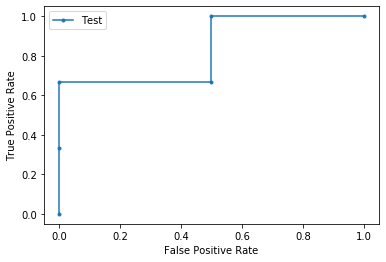

In [0]:

y_true = np.array([0, 1, 1, 1, 0])
y_predicted = np.array([0.1, 0.7, 0.4, 0.2, 0.27])
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
data.target_names

NameError: ignored